In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd

<Axes: >

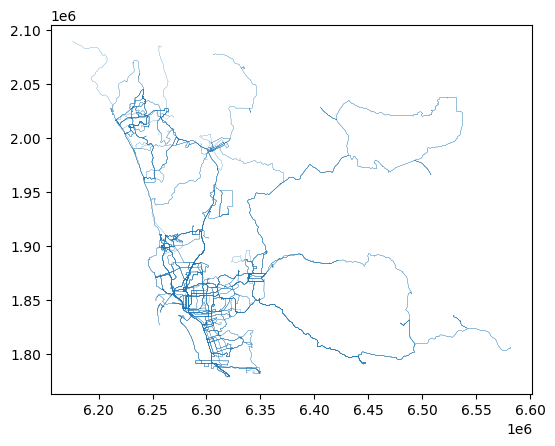

In [3]:
transit_routes = gpd.read_file('..\\Data\\transit_routes_datasd\\transit_routes_datasd.shp')

transit_routes.plot(linewidth = 0.1)

In [8]:
from census import Census

In [9]:



from census import Census
from us import states
import pandas as pd

API_KEY = '9e94761d2b2fb214de8b88bdaeccc47b8edded35'
#You can request an API key from https://api.census.gov/data/key_signup.html
c = Census(API_KEY)

commute_census = c.acs5.state_county_tract(
    #See https://api.census.gov/data/2021/acs/acs5/groups/B08303.html for available fields
    fields = ('B08303_001E'),
    state_fips = states.CA.fips,
    #Fips code for SD county
    county_fips = "073",
    #All census tracts
    tract = "*",
    #2021 is the latest year that data appears to be available
    year = 2021
)

commute_df = pd.DataFrame(commute_census)

In [10]:
for i in range(2,10):
    commute_census_tmp = c.acs5.state_county_tract(
        #See https://api.census.gov/data/2021/acs/acs5/groups/B08303.html for available fields
        fields = ('B08303_00'+str(i)+'E'),
        state_fips = states.CA.fips,
        #Fips code for SD county
        county_fips = "073",
        #All census tracts
        tract = "*",
        #2021 is the latest year that data appears to be available
        year = 2021

    )
    commute_df_tmp = pd.DataFrame(commute_census_tmp)
    commute_df[str(i)] = commute_df_tmp['B08303_00'+str(i)+'E']

for i in range(10,14):
    commute_census_tmp = c.acs5.state_county_tract(
        #See https://api.census.gov/data/2021/acs/acs5/groups/B08303.html for available fields
        fields = ('B08303_0'+str(i)+'E'),
        state_fips = states.CA.fips,
        #Fips code for SD county
        county_fips = "073",
        #All census tracts
        tract = "*",
        #2021 is the latest year that data appears to be available
        year = 2021

    )
    commute_df_tmp = pd.DataFrame(commute_census_tmp)
    commute_df[str(i)] = commute_df_tmp['B08303_0'+str(i)+'E']


In [11]:
commute_mean_time = [0 for x in range(737)]
for i in range(2,11):
    commute_mean_time = commute_mean_time + \
        commute_df[str(i)]*(2.5+(i-2)*5)

commute_mean_time = commute_mean_time +  commute_df['11']*52.75
commute_mean_time = commute_mean_time +  commute_df['12']*75
commute_mean_time = commute_mean_time/commute_df['B08303_001E']

# Ignoring 90 mins for now.
commute_mean_time.mean()

26.785408453368607

In [16]:
commute_total_time = [0 for x in range(737)]
for i in range(2,14):
    commute_total_time = commute_total_time +\
        commute_df.loc[:,str(i)]
commute_total_time


0       982.0
1       935.0
2      2184.0
3      1376.0
4      1860.0
        ...  
732    2030.0
733    2040.0
734     708.0
735    1950.0
736       0.0
Length: 737, dtype: float64

In [17]:
commute_df['B08303_001E']

0       982.0
1       935.0
2      2184.0
3      1376.0
4      1860.0
        ...  
732    2030.0
733    2040.0
734     708.0
735    1950.0
736       0.0
Name: B08303_001E, Length: 737, dtype: float64

In [18]:
commute_df['Mean Time'] = commute_mean_time
commute_df.to_csv("Travel_Time_Table",index=False)